In [2]:
#1. Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
##2. Load the Dataset
data = pd.read_csv('customer_segmentation_data.csv')

In [9]:
#View the first few rows of the dataset
print(data.head())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [10]:
#Check for missing values
print(data.isnull().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [11]:
#Get a summary of the dataset
print(data.describe())

                id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500

In [12]:
#Check the data types of each column
print(data.dtypes)

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object


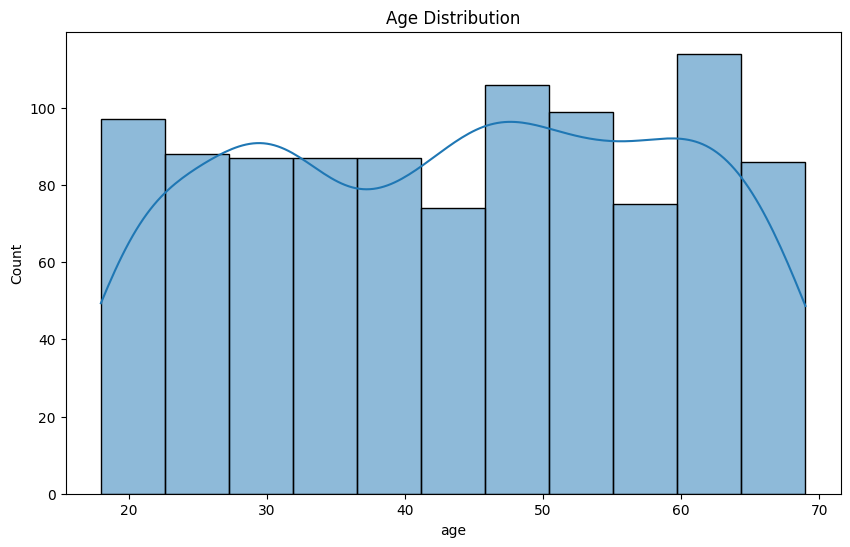

In [13]:
#Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

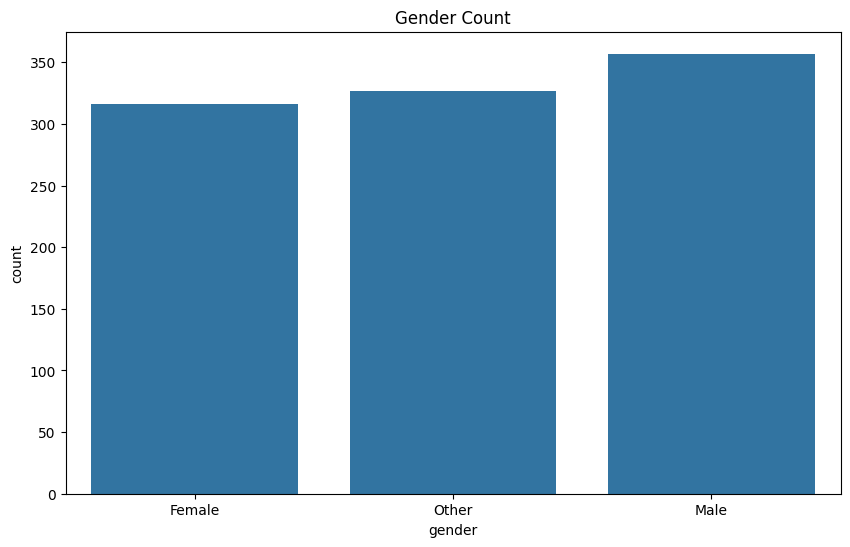

In [14]:
#Gender Count
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=data)
plt.title('Gender Count')
plt.show()

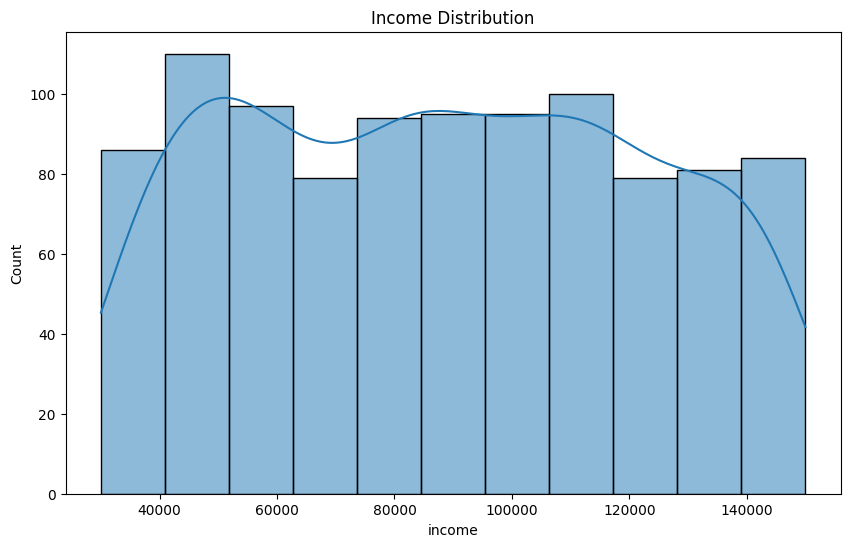

In [15]:
#Income Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['income'], kde=True)
plt.title('Income Distribution')
plt.show()


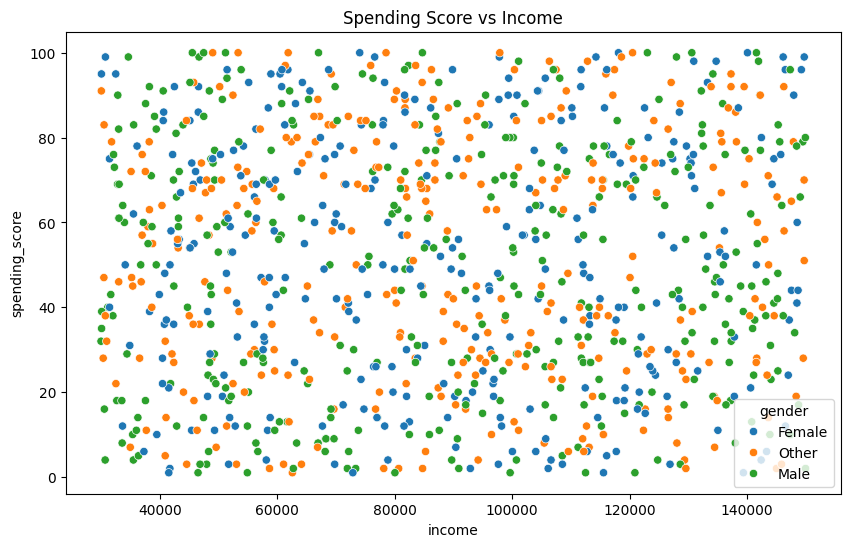

In [16]:
#Spending Score vs Income
plt.figure(figsize=(10,6))
sns.scatterplot(x='income', y='spending_score', data=data, hue='gender')
plt.title('Spending Score vs Income')
plt.show()

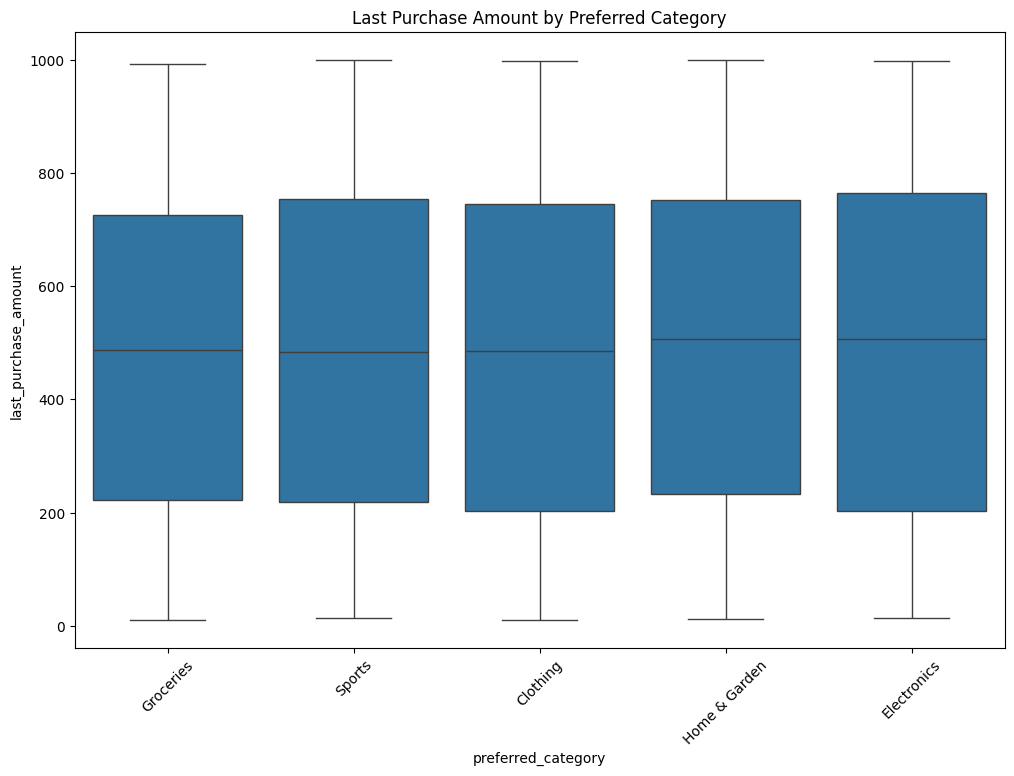

In [17]:
#Boxplot of Last Purchase Amount by Preferred Category
plt.figure(figsize=(12,8))
sns.boxplot(x='preferred_category', y='last_purchase_amount', data=data)
plt.title('Last Purchase Amount by Preferred Category')
plt.xticks(rotation=45)
plt.show()